# 1. FINANCIAL STOCK NEWS SENTIMENT ANALYSIS

## i. Using a model from Huggingface without fine-tuning

In [1]:
! pip install transformers datasets


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## ii. Data Loading and Preprocessing

In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

ds = load_dataset("NickyNicky/finance-financialmodelingprep-stock-news-sentiments-rss-feed", split="train")

# Show the first 5 rows of the dataset
ds[:5]

/root/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-25 10:50:37.799571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 10:50:37.946189: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 10:50:37.950577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

{'symbol': ['HE', 'CRS', 'BB', 'TECK', 'AGF'],
 'publishedDate': ['2023-10-04T21:54:28.000Z',
  '2023-10-04T21:40:00.000Z',
  '2023-10-04T21:34:09.000Z',
  '2023-10-04T21:17:00.000Z',
  '2023-10-04T21:13:38.000Z'],
 'title': ['HE REMINDER: Kessler Topaz Meltzer & Check, LLP Reminds Hawaiian Electric Industries, Inc. (HE) Shareholders of Securities Fraud Class Action Lawsuit and Encourages Investors with Substantial Losses to Contact the Firm',
  'Carpenter Technology Announces Conference Call and Webcast',
  "What's Going On With BlackBerry Stock After Hours?",
  'Teck to Release Third Quarter 2023 Results on October 24, 2023',
  'AGF Reports September 2023 Assets Under Management and Fee-Earning Assets'],
 'image': ['/next-assets/images/schema-image-default.png',
  'https://ml.globenewswire.com/Resource/Download/7c55611a-3a49-4ccf-ba73-ce17859753db',
  'https://cdn.benzinga.com/files/images/story/2023/10/04/noc_10.jpg?optimize=medium&dpr=1&auto=webp&height=800&width=1456&fit=crop',
  

In [3]:
# Dropping unnecessary columns
ds = pd.DataFrame(ds)
df = ds.drop(columns=["image", "title", "image", "site", "url", "sentimentScore"], axis=1)

#Filter the symbol
df = df[df["symbol"] == "INTC"]
df

,symbol,publishedDate,text,sentiment
26,INTC,2023-10-04T20:20:37.000Z,Rosenblatt analyst Hans Mosesmann reiterated I...,Positive
178,INTC,2023-10-04T13:57:43.000Z,"Amid an uninspiring day on Wall Street, shares...",Positive
499,INTC,2023-10-03T20:33:45.000Z,Intel Corp (NASDAQ: INTC) shares are trading h...,Positive
1398,INTC,2023-10-02T06:45:19.000Z,It’s an understatement to say that Intel (NASD...,Positive
1472,INTC,2023-10-01T14:42:39.000Z,The case for investing in growth stocks has be...,Positive
...,...,...,...,...
133053,INTC,2022-09-06T10:40:32.000Z,"Source: Shutterstock Today, a number of chip s...",Positive
133056,INTC,2022-09-06T10:33:56.000Z,Semiconductor stocks rose over the weekend aft...,Positive
136361,INTC,2022-08-26T16:28:00.000Z,Shares of Intel ...,Negative
136422,INTC,2022-08-26T14:25:54.000Z,Intel (NASDAQ:INTC) stock is in focus followin...,Positive


In [4]:
df['sentiment'].value_counts()

sentiment
Positive    244
Negative     41
Neutral       5
Name: count, dtype: int64

## iii. Inputting data to the LLM Model

In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

sample_df_text = df["text"].apply(preprocess_text)


text_list = sample_df_text.tolist()

# Pass the list to the sentiment analyzer
results = sentiment_analyzer(text_list)
results

[{'label': 'positive', 'score': 0.9962813258171082},
 {'label': 'positive', 'score': 0.9995166063308716},
 {'label': 'positive', 'score': 0.9993415474891663},
 {'label': 'positive', 'score': 0.9996519088745117},
 {'label': 'negative', 'score': 0.9984500408172607},
 {'label': 'positive', 'score': 0.999701201915741},
 {'label': 'neutral', 'score': 0.9998706579208374},
 {'label': 'positive', 'score': 0.9988456964492798},
 {'label': 'positive', 'score': 0.8718595504760742},
 {'label': 'positive', 'score': 0.9253379106521606},
 {'label': 'positive', 'score': 0.9994685053825378},
 {'label': 'neutral', 'score': 0.9995725750923157},
 {'label': 'positive', 'score': 0.7703142166137695},
 {'label': 'negative', 'score': 0.997936487197876},
 {'label': 'positive', 'score': 0.8629226088523865},
 {'label': 'positive', 'score': 0.9692911505699158},
 {'label': 'positive', 'score': 0.952965259552002},
 {'label': 'neutral', 'score': 0.9979173541069031},
 {'label': 'positive', 'score': 0.9997066855430603},

## iv. Results

In [ ]:
true_labels = df['sentiment']

true_labels = true_labels.str.lower()

predicted_labels = [result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
26,positive,positive,0.996281
178,positive,positive,0.999517
499,positive,positive,0.999342
1398,positive,positive,0.999652
1472,positive,negative,0.998450
...,...,...,...
133053,positive,neutral,0.957322
133056,positive,positive,0.999238
136361,negative,negative,0.998774
136422,positive,neutral,0.994155


In [ ]:
#add the date for the comparison according to the index
comparison_df['publishedDate'] = df['publishedDate']
comparison_df

,True Label,Predicted Label,Confidence Score,publishedDate
26,positive,positive,0.996281,2023-10-04T20:20:37.000Z
178,positive,positive,0.999517,2023-10-04T13:57:43.000Z
499,positive,positive,0.999342,2023-10-03T20:33:45.000Z
1398,positive,positive,0.999652,2023-10-02T06:45:19.000Z
1472,positive,negative,0.998450,2023-10-01T14:42:39.000Z
...,...,...,...,...
133053,positive,neutral,0.957322,2022-09-06T10:40:32.000Z
133056,positive,positive,0.999238,2022-09-06T10:33:56.000Z
136361,negative,negative,0.998774,2022-08-26T16:28:00.000Z
136422,positive,neutral,0.994155,2022-08-26T14:25:54.000Z


## v. Accuracy

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 57.93%'

## vi. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['positive', 'negative', 'neutral'])

print(conf_matrix)


[[137  57  50]
 [  6  31   4]
 [  2   3   0]]


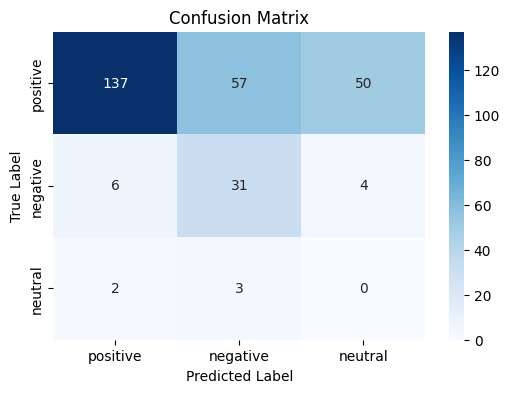

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


This confusion matrix indicates that the machine learning model performs well at predicting positive sentiments (137 correct predictions) but struggles with neutral sentiment (only 0 correct predictions). There is also moderate performance in predicting negative sentiments (31 correct predictions), but a significant amount of misclassification exists, especially with positive and negative labels overlapping. The model needs improvement in distinguishing neutral sentiments and reducing false positives for better financial news sentiment analysis.

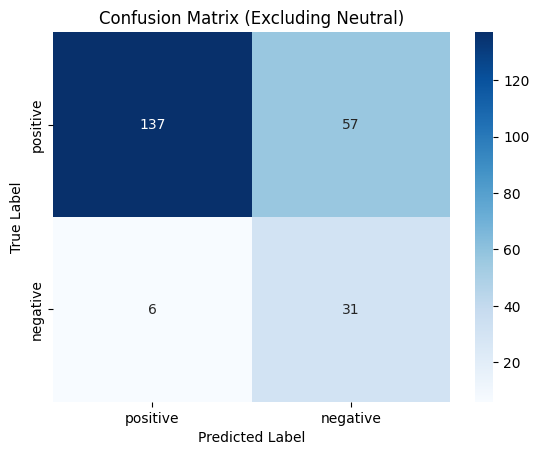

In [12]:
# Confusion Matrix without neutral label
filtered_conf_matrix = conf_matrix[:2, :2]  # Keep only the first two rows and columns

sns.heatmap(filtered_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title("Confusion Matrix (Excluding Neutral)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix Overview (Excluding Neutral):
True Positives (TP): 137 (Positive samples correctly classified as positive)
False Positives (FP): 57 (Negative samples incorrectly classified as positive)
False Negatives (FN): 6 (Positive samples incorrectly classified as negative)
True Negatives (TN): 31 (Negative samples correctly classified as negative)

The model has a bias toward predicting positive sentiments, as evidenced by the high number of false positives for negative samples. This could indicate a class imbalance or insufficient feature differentiation between positive and negative sentiments.

## Comparing News with The Stock Data

### i. Preprocess the stock data and the sentiment analysis result

In [13]:
#Import yfinance
!pip install yfinance
import yfinance as yf

#Define the ticker symbol
ticker_symbol = 'INTC'

#Get the stock data from the specified timeframe
stock_data = yf.download(ticker_symbol, start='2022-08-17', end='2023-10-11')

#Reset the index to convert the date index into a column
stock_data = stock_data.reset_index()

#Display the stock data with labeled date
stock_data



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,INTC,INTC,INTC,INTC,INTC,INTC
0,2022-08-17,34.042080,35.779999,36.080002,35.270000,35.810001,29176100
1,2022-08-18,34.441685,36.200001,36.330002,35.570000,35.680000,24598200
2,2022-08-19,33.661514,35.380001,36.029999,35.189999,35.799999,31425500
3,2022-08-22,32.196312,33.840000,35.060001,33.730000,35.000000,51006100
4,2022-08-23,32.300972,33.950001,34.389999,33.910000,33.980000,30687100
...,...,...,...,...,...,...,...
284,2023-10-04,35.338951,35.930000,36.520000,35.330002,36.520000,39842200
285,2023-10-05,35.299606,35.889999,36.099998,35.599998,35.970001,25771200
286,2023-10-06,35.594677,36.189999,36.459999,35.180000,35.869999,33252300


In [ ]:
stock_data = stock_data.drop(columns=["Volume", "Adj Close", "Open", "High", "Low"], axis=1)
stock_data

/tmp/ipykernel_631/467705425.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  stock_data = stock_data.drop(columns=["Volume", "Adj Close", "Open", "High", "Low"], axis=1)


Price,Date,Close
Ticker,,INTC
0,2022-08-17,35.779999
1,2022-08-18,36.200001
2,2022-08-19,35.380001
3,2022-08-22,33.840000
4,2022-08-23,33.950001
...,...,...
284,2023-10-04,35.930000
285,2023-10-05,35.889999
286,2023-10-06,36.189999


In [15]:
predict_df = pd.DataFrame({
    'publishedDate': pd.to_datetime(comparison_df['publishedDate']).dt.date,  # Convert to datetime and extract only the date
    'sentimentAnalysis': comparison_df['Predicted Label']
})
predict_df

,publishedDate,sentimentAnalysis
26,2023-10-04,positive
178,2023-10-04,positive
499,2023-10-03,positive
1398,2023-10-02,positive
1472,2023-10-01,negative
...,...,...
133053,2022-09-06,neutral
133056,2022-09-06,positive
136361,2022-08-26,negative
136422,2022-08-26,neutral


### a. Analysis #1

In [ ]:
predict_df_1 = predict_df.iloc[:6]
predict_df_1

,publishedDate,sentimentAnalysis
26,2023-10-04,positive
178,2023-10-04,positive
499,2023-10-03,positive
1398,2023-10-02,positive
1472,2023-10-01,negative
2086,2023-09-28,positive


In [17]:
#get the timeframe 2023-09-25 to 2023-10-08 from stock data
stock_data_ex_1 = stock_data[(stock_data['Date'] >= '2023-09-25') & (stock_data['Date'] <= '2023-10-08')]
stock_data_ex_1

Price,Date,Close
Ticker,,INTC
277,2023-09-25,34.290001
278,2023-09-26,33.830002
279,2023-09-27,34.610001
280,2023-09-28,35.180000
281,2023-09-29,35.549999
282,2023-10-02,35.459999
283,2023-10-03,35.689999
284,2023-10-04,35.930000
285,2023-10-05,35.889999


/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:694: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:834: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


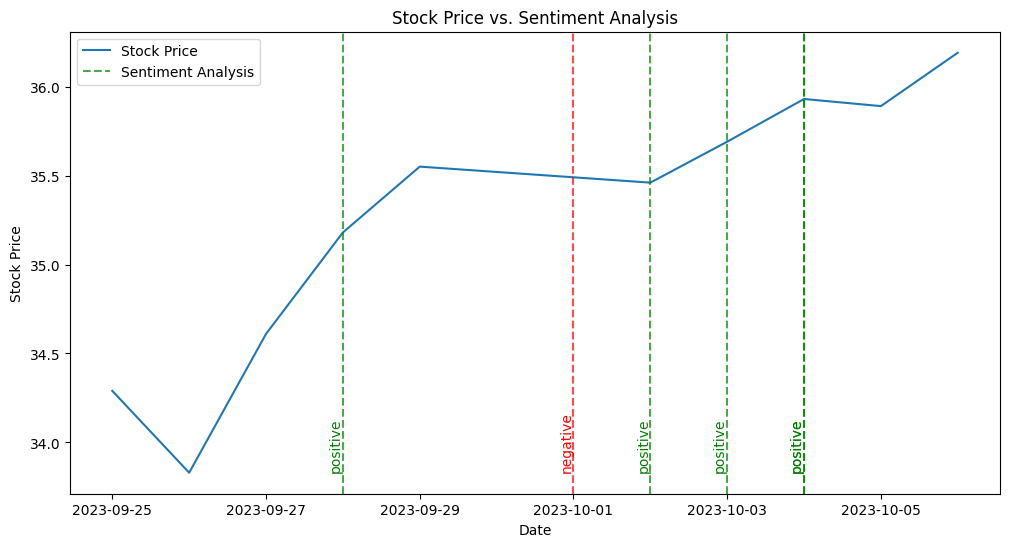

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))

plt.plot(stock_data_ex_1['Date'], stock_data_ex_1['Close'], label='Stock Price')

# Add vertical lines with sentiment labels
for date, sentiment in zip(predict_df_1['publishedDate'], predict_df_1['sentimentAnalysis']):
    line_color = 'green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue'
    
    plt.axvline(x=date, color=line_color, linestyle='--', alpha=0.7) 
    plt.text(
        date, 
        stock_data_ex_1['Close'].min(),  
        sentiment, 
        rotation=90,  
        verticalalignment='bottom', 
        horizontalalignment='right', 
        fontsize=10, 
        color=line_color  
    )

# Labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price vs. Sentiment Analysis')
plt.legend(['Stock Price', 'Sentiment Analysis'])
plt.show()


### b. Analysis #2

In [19]:
#get stock data from 2023-01-29 to 2023-02-29
# Ensure the Date column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter the stock data between 2023-01-29 and 2023-02-29
stock_data_ex_2 = stock_data[
    (stock_data['Date'] >= pd.to_datetime('2023-01-29')) & 
    (stock_data['Date'] <= pd.to_datetime('2023-03-05'))
]
stock_data_ex_2


Price,Date,Close
Ticker,,INTC
113,2023-01-30,27.950001
114,2023-01-31,28.260000
115,2023-02-01,29.070000
116,2023-02-02,30.190001
117,2023-02-03,30.320000
118,2023-02-06,28.690001
119,2023-02-07,29.049999
120,2023-02-08,28.240000
121,2023-02-09,27.730000


In [20]:
from datetime import date

# Convert the string dates to datetime.date for comparison
start_date = date(2023, 1, 29)
end_date = date(2023, 2, 28)

# Filter the DataFrame based on the date range
predict_df_2 = predict_df[(predict_df['publishedDate'] >= start_date) & (predict_df['publishedDate'] <= end_date)]

# Remove specific rows by index
predict_df_2 = predict_df_2.drop([74264, 74223, 78700], errors='ignore')  # Use `errors='ignore'` in case the indices don't exist

# Display the filtered DataFrame
predict_df_2


,publishedDate,sentimentAnalysis
73286,2023-02-28,positive
73835,2023-02-27,neutral
74105,2023-02-24,negative
74278,2023-02-23,negative
74782,2023-02-16,neutral
76138,2023-02-10,positive
76895,2023-02-08,negative
78496,2023-02-03,positive
79647,2023-02-01,negative
80656,2023-01-30,positive


/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:694: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:834: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


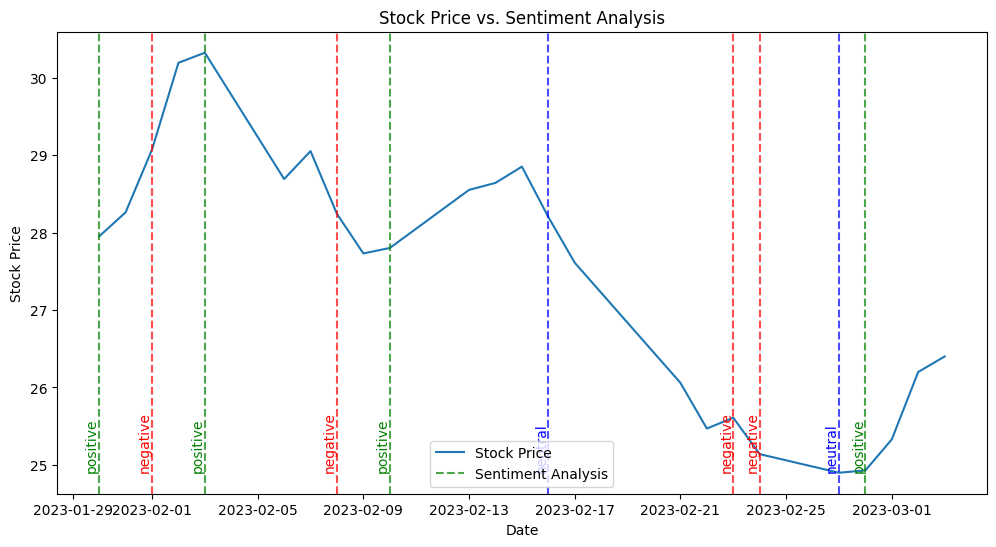

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))

plt.plot(stock_data_ex_2['Date'], stock_data_ex_2['Close'], label='Stock Price')

# Add vertical lines with sentiment labels beside the line
for date, sentiment in zip(predict_df_2['publishedDate'], predict_df_2['sentimentAnalysis']):
    line_color = 'green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue'
    
    plt.axvline(x=date, color=line_color, linestyle='--', alpha=0.7)
    plt.text(
        date, 
        stock_data_ex_2['Close'].min(), 
        sentiment, 
        rotation=90, 
        verticalalignment='bottom',  
        horizontalalignment='right',  
        fontsize=10, 
        color=line_color  
    )

# Labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price vs. Sentiment Analysis')
plt.legend(['Stock Price', 'Sentiment Analysis'])
plt.show()


# Sentiment Analysis with a Model that We Fine-tuned Ourselves

## Data Loading and Preprocessing

In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

ds2 = load_dataset("NickyNicky/finance-financialmodelingprep-stock-news-sentiments-rss-feed", split="train")
ds2[:5]

{'symbol': ['HE', 'CRS', 'BB', 'TECK', 'AGF'],
 'publishedDate': ['2023-10-04T21:54:28.000Z',
  '2023-10-04T21:40:00.000Z',
  '2023-10-04T21:34:09.000Z',
  '2023-10-04T21:17:00.000Z',
  '2023-10-04T21:13:38.000Z'],
 'title': ['HE REMINDER: Kessler Topaz Meltzer & Check, LLP Reminds Hawaiian Electric Industries, Inc. (HE) Shareholders of Securities Fraud Class Action Lawsuit and Encourages Investors with Substantial Losses to Contact the Firm',
  'Carpenter Technology Announces Conference Call and Webcast',
  "What's Going On With BlackBerry Stock After Hours?",
  'Teck to Release Third Quarter 2023 Results on October 24, 2023',
  'AGF Reports September 2023 Assets Under Management and Fee-Earning Assets'],
 'image': ['/next-assets/images/schema-image-default.png',
  'https://ml.globenewswire.com/Resource/Download/7c55611a-3a49-4ccf-ba73-ce17859753db',
  'https://cdn.benzinga.com/files/images/story/2023/10/04/noc_10.jpg?optimize=medium&dpr=1&auto=webp&height=800&width=1456&fit=crop',
  

In [ ]:
ds2 = pd.DataFrame(ds2)
df2 = ds2.drop(columns=["image", "title", "image", "site", "url", "sentimentScore"], axis=1)

#Filter the symbol
df2 = df2[df2["symbol"] == "INTC"]
df2

,symbol,publishedDate,text,sentiment
26,INTC,2023-10-04T20:20:37.000Z,Rosenblatt analyst Hans Mosesmann reiterated I...,Positive
178,INTC,2023-10-04T13:57:43.000Z,"Amid an uninspiring day on Wall Street, shares...",Positive
499,INTC,2023-10-03T20:33:45.000Z,Intel Corp (NASDAQ: INTC) shares are trading h...,Positive
1398,INTC,2023-10-02T06:45:19.000Z,It’s an understatement to say that Intel (NASD...,Positive
1472,INTC,2023-10-01T14:42:39.000Z,The case for investing in growth stocks has be...,Positive
...,...,...,...,...
133053,INTC,2022-09-06T10:40:32.000Z,"Source: Shutterstock Today, a number of chip s...",Positive
133056,INTC,2022-09-06T10:33:56.000Z,Semiconductor stocks rose over the weekend aft...,Positive
136361,INTC,2022-08-26T16:28:00.000Z,Shares of Intel ...,Negative
136422,INTC,2022-08-26T14:25:54.000Z,Intel (NASDAQ:INTC) stock is in focus followin...,Positive


In [24]:
df2['sentiment'].value_counts()

sentiment
Positive    244
Negative     41
Neutral       5
Name: count, dtype: int64

## Data Loading and Preprocessing

In [25]:
from transformers import pipeline

sentiment_analyzer_ft = pipeline("text-classification", model="msr2903/mrm8488-distilroberta-fine-tuned-financial-sentiment")

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.strip()
    return text

sample_df_text2 = df2["text"].apply(preprocess_text)

text_list_ft = sample_df_text2.tolist()

results_ft = sentiment_analyzer_ft(text_list_ft)
results_ft

[{'label': 'positive', 'score': 0.9995642304420471},
 {'label': 'positive', 'score': 0.999630331993103},
 {'label': 'positive', 'score': 0.9996618032455444},
 {'label': 'positive', 'score': 0.9995506405830383},
 {'label': 'positive', 'score': 0.9995301961898804},
 {'label': 'positive', 'score': 0.9996601343154907},
 {'label': 'positive', 'score': 0.999508261680603},
 {'label': 'positive', 'score': 0.99967360496521},
 {'label': 'positive', 'score': 0.9994412064552307},
 {'label': 'positive', 'score': 0.9996708631515503},
 {'label': 'positive', 'score': 0.9996740818023682},
 {'label': 'positive', 'score': 0.9995967745780945},
 {'label': 'positive', 'score': 0.9996658563613892},
 {'label': 'positive', 'score': 0.999340832233429},
 {'label': 'positive', 'score': 0.9979454874992371},
 {'label': 'positive', 'score': 0.9987840056419373},
 {'label': 'positive', 'score': 0.9995200634002686},
 {'label': 'positive', 'score': 0.9988464117050171},
 {'label': 'positive', 'score': 0.9995087385177612}

## Results

In [ ]:
true_labels_ft = df2['sentiment']

true_labels_ft = true_labels_ft.str.lower()

predicted_labels_ft = [result['label'] for result in results_ft]

comparison_df_ft = pd.DataFrame({
    'True Label': true_labels_ft,
    'Predicted Label': predicted_labels_ft,
    'Confidence Score': [result['score'] for result in results_ft]
})
comparison_df_ft

,True Label,Predicted Label,Confidence Score
26,positive,positive,0.999564
178,positive,positive,0.999630
499,positive,positive,0.999662
1398,positive,positive,0.999551
1472,positive,positive,0.999530
...,...,...,...
133053,positive,positive,0.999505
133056,positive,positive,0.999415
136361,negative,negative,0.996379
136422,positive,positive,0.999670


In [ ]:
comparison_df_ft['publishedDate'] = df2['publishedDate']
comparison_df_ft

,True Label,Predicted Label,Confidence Score,publishedDate
26,positive,positive,0.999564,2023-10-04T20:20:37.000Z
178,positive,positive,0.999630,2023-10-04T13:57:43.000Z
499,positive,positive,0.999662,2023-10-03T20:33:45.000Z
1398,positive,positive,0.999551,2023-10-02T06:45:19.000Z
1472,positive,positive,0.999530,2023-10-01T14:42:39.000Z
...,...,...,...,...
133053,positive,positive,0.999505,2022-09-06T10:40:32.000Z
133056,positive,positive,0.999415,2022-09-06T10:33:56.000Z
136361,negative,negative,0.996379,2022-08-26T16:28:00.000Z
136422,positive,positive,0.999670,2022-08-26T14:25:54.000Z


## Accuracy (Fine-tuned)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_ft = accuracy_score(true_labels_ft, predicted_labels_ft)
f"Accuracy: {accuracy_ft * 100:.2f}%"

'Accuracy: 94.48%'

## Confusion Matrix (Fine-tuned)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_ft = confusion_matrix(true_labels_ft, predicted_labels_ft, labels=['positive', 'negative', 'neutral'])

print(conf_matrix_ft)

[[238   5   1]
 [  7  34   0]
 [  1   2   2]]


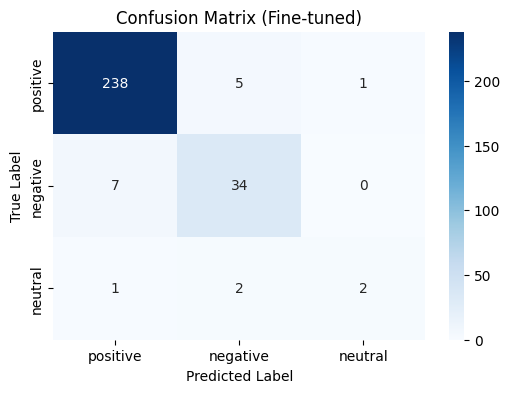

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ft, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Fine-tuned)')
plt.show()

This confusion matrix indicates that the machine learning model performs well at all sentiments, where the dataset contains mostly from positive sentiments (238 correct predictions from 137). The model also corrects at neutral sentiment (2 correct predictions from 0 correct predictions). There is also an improvement in predicting negative sentiments (34 correct predictions from 31).

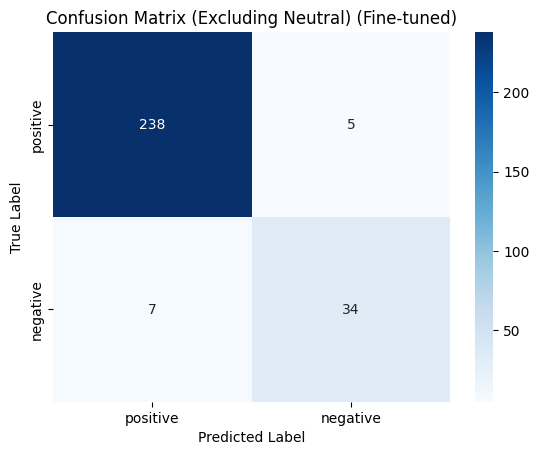

In [ ]:
filtered_conf_matrix_ft = conf_matrix_ft[:2, :2] 

sns.heatmap(filtered_conf_matrix_ft, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title("Confusion Matrix (Excluding Neutral) (Fine-tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix Overview (Excluding Neutral):
True Positives (TP): 238 (Positive samples correctly classified as positive)
False Positives (FP): 7 (Negative samples incorrectly classified as positive)
False Negatives (FN): 5 (Positive samples incorrectly classified as negative)
True Negatives (TN): 34 (Negative samples correctly classified as negative)

Accuracy: 95.8% (excluding neutral)

The model that has been trained is now better at predicting the dataset. However, needs to be noted that the model is trained using this dataset itself that has 88% positive sentiments. The model itself can be good at predicting positive sentiments in other dataset even though the result shows that there's also an improvement in predicting the negative. 

## Analysis #1

In [ ]:
predict_df_ft = pd.DataFrame({
    'publishedDate': pd.to_datetime(comparison_df_ft['publishedDate']).dt.date,
    'sentimentAnalysis': comparison_df_ft['Predicted Label']
})
predict_df_ft

,publishedDate,sentimentAnalysis
26,2023-10-04,positive
178,2023-10-04,positive
499,2023-10-03,positive
1398,2023-10-02,positive
1472,2023-10-01,positive
...,...,...
133053,2022-09-06,positive
133056,2022-09-06,positive
136361,2022-08-26,negative
136422,2022-08-26,positive


In [ ]:
predict_df_1_ft = predict_df_ft.iloc[:6]
predict_df_1_ft

,publishedDate,sentimentAnalysis
26,2023-10-04,positive
178,2023-10-04,positive
499,2023-10-03,positive
1398,2023-10-02,positive
1472,2023-10-01,positive
2086,2023-09-28,positive


In [ ]:
stock_data_ex_1_ft = stock_data[(stock_data['Date'] >= '2023-09-25') & (stock_data['Date'] <= '2023-10-08')]
stock_data_ex_1_ft

Price,Date,Close
Ticker,,INTC
277,2023-09-25,34.290001
278,2023-09-26,33.830002
279,2023-09-27,34.610001
280,2023-09-28,35.180000
281,2023-09-29,35.549999
282,2023-10-02,35.459999
283,2023-10-03,35.689999
284,2023-10-04,35.930000
285,2023-10-05,35.889999


/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:694: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:834: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


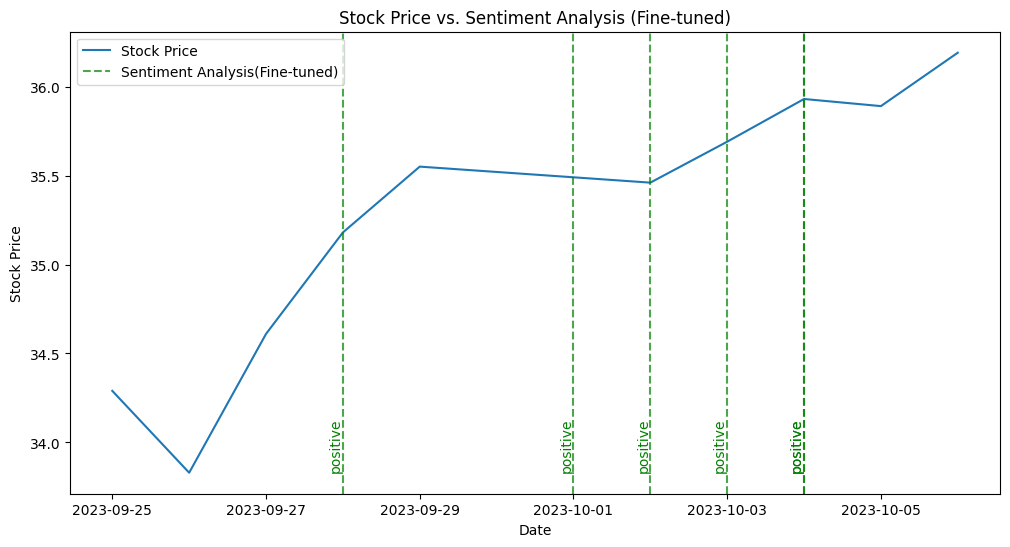

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))

plt.plot(stock_data_ex_1['Date'], stock_data_ex_1_ft['Close'], label='Stock Price')

# Add vertical lines with sentiment labels
for date, sentiment in zip(predict_df_1_ft['publishedDate'], predict_df_1_ft['sentimentAnalysis']):
    line_color = 'green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue'
    
    plt.axvline(x=date, color=line_color, linestyle='--', alpha=0.7) 
    plt.text(
        date, 
        stock_data_ex_1_ft['Close'].min(),  
        sentiment, 
        rotation=90,  
        verticalalignment='bottom', 
        horizontalalignment='right', 
        fontsize=10, 
        color=line_color  
    )

# Labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price vs. Sentiment Analysis (Fine-tuned)')
plt.legend(['Stock Price', 'Sentiment Analysis(Fine-tuned)'])
plt.show()

## Analysis #2

In [37]:
#get stock data from 2023-01-29 to 2023-02-29
# Ensure the Date column is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter the stock data between 2023-01-29 and 2023-02-29
stock_data_ex_2_ft = stock_data[
    (stock_data['Date'] >= pd.to_datetime('2023-01-29')) & 
    (stock_data['Date'] <= pd.to_datetime('2023-03-05'))
]
stock_data_ex_2_ft

Price,Date,Close
Ticker,,INTC
113,2023-01-30,27.950001
114,2023-01-31,28.260000
115,2023-02-01,29.070000
116,2023-02-02,30.190001
117,2023-02-03,30.320000
118,2023-02-06,28.690001
119,2023-02-07,29.049999
120,2023-02-08,28.240000
121,2023-02-09,27.730000


In [38]:
from datetime import date

# Convert the string dates to datetime.date for comparison
start_date = date(2023, 1, 29)
end_date = date(2023, 2, 28)

# Filter the DataFrame based on the date range
predict_df_2_ft = predict_df_ft[(predict_df_ft['publishedDate'] >= start_date) & (predict_df_ft['publishedDate'] <= end_date)]

# Remove specific rows by index
predict_df_2_ft = predict_df_2_ft.drop([74264, 74223, 78700], errors='ignore')  # Use `errors='ignore'` in case the indices don't exist

# Display the filtered DataFrame
predict_df_2_ft

,publishedDate,sentimentAnalysis
73286,2023-02-28,positive
73835,2023-02-27,positive
74105,2023-02-24,positive
74278,2023-02-23,positive
74782,2023-02-16,positive
76138,2023-02-10,positive
76895,2023-02-08,positive
78496,2023-02-03,negative
79647,2023-02-01,negative
80656,2023-01-30,positive


/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:694: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/text.py:834: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


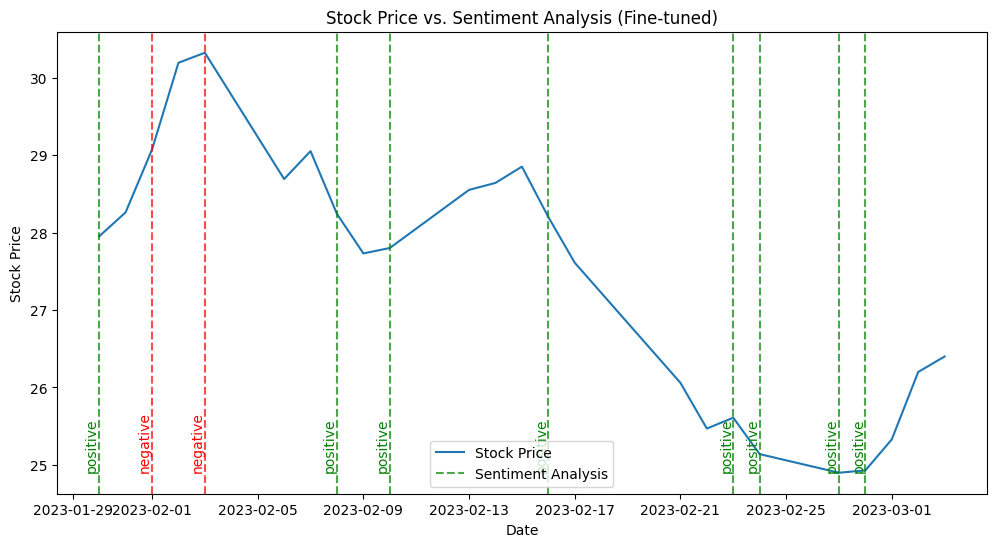

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))

plt.plot(stock_data_ex_2_ft['Date'], stock_data_ex_2_ft['Close'], label='Stock Price')

# Add vertical lines with sentiment labels beside the line
for date, sentiment in zip(predict_df_2_ft['publishedDate'], predict_df_2_ft['sentimentAnalysis']):
    line_color = 'green' if sentiment == 'positive' else 'red' if sentiment == 'negative' else 'blue'
    
    plt.axvline(x=date, color=line_color, linestyle='--', alpha=0.7)
    plt.text(
        date, 
        stock_data_ex_2['Close'].min(), 
        sentiment, 
        rotation=90, 
        verticalalignment='bottom',  
        horizontalalignment='right',  
        fontsize=10, 
        color=line_color  
    )

# Labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price vs. Sentiment Analysis (Fine-tuned)')
plt.legend(['Stock Price', 'Sentiment Analysis'])
plt.show()

# 3. CONCLUSION

From the results, we can conclude that positive news does not necessarily lead to an increase in stock prices, and the same applies in reverse. Additionally, we observed some interesting findings regarding accuracy. When we include the "neutral" label in the LLM predictions, the accuracy is approximately 57.93%. However, when we exclude the "neutral" label and focus solely on predicting "positive" and "negative" labels, the accuracy improves by about 20%, reaching 72.7%.

Examining the confusion matrix reveals a bias toward the positive label in both cases. This bias may be caused by the imbalanced dataset, where the majority of the data is labeled as "positive."

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9b73b1b7-7709-4404-aa43-c47d3b260c6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>